# 257 二叉树的所有路径
输入：二叉树  
输出：所有从根节点到叶子结点的路径  
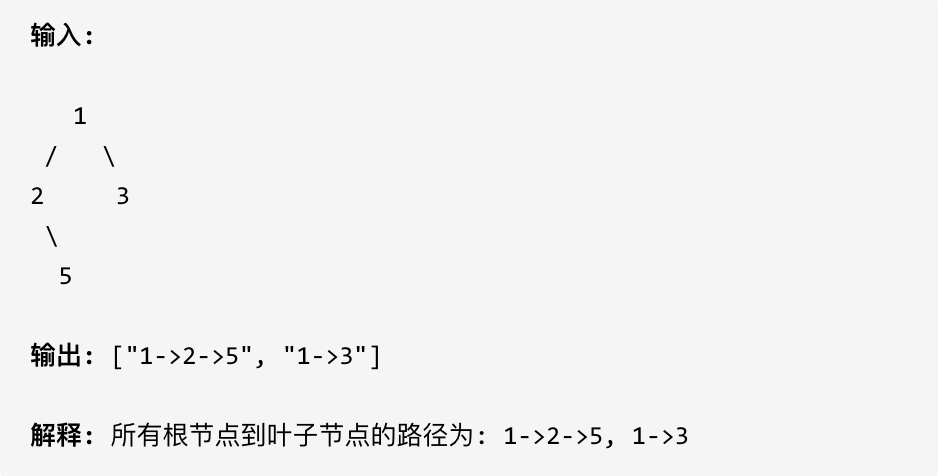

## 思路
先判断遍历方式：  
需要从根节点开始，依次向下找到叶子节点并记录路径  
- 前序遍历：方便让父节点指向左右孩子

回溯：记录路径  
- 每次到达叶子结点之后还需要保存叶子结点的最近的父节点  
- 然后回溯到父节点，继续访问父节点的下一个孩子（叶子节点）  
- 同时一个节点的所有叶子节点访问完之后，还需要继续 回溯 到上一层的父节点访问另一个子树

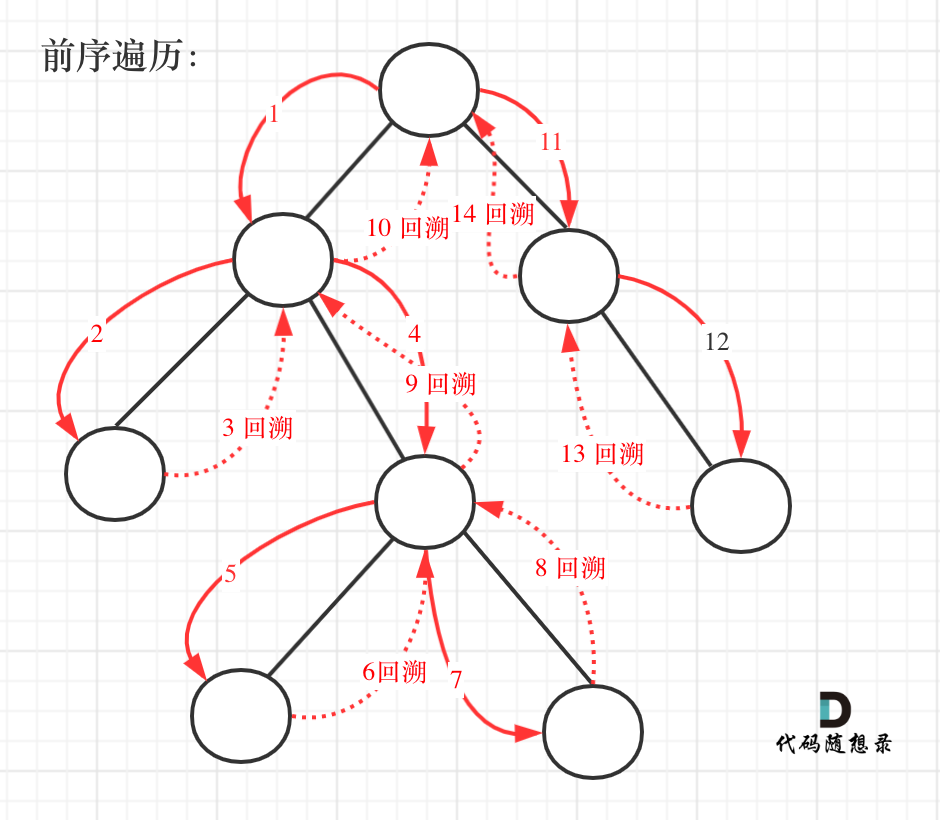

这个图有没有感觉很像递归？递归和回溯其实就是一家的，递归也是一种回溯的思想

### 递归
1. 参数和返回值  
   - 参数：根节点、每一条路径的path、存放路径结果的列表result  
   - 返回值：无

2. 终止条件  
   - 本题中不是空节点终止  
   - 向下的过程中每次遇到叶子节点就要开始记录结果了  
   - 所以找到叶子节点就要开始结束处理逻辑  
   - 判断叶子节点：**当前节点的左右孩子都为空**  
   - 小细节：记录的path是由一串节点值组成的，需要转换为string的输出格式

3. 递归逻辑  
   - 前序遍历的处理顺序：中左右  
   - 中间节点：放进path中  
   - 递归左右孩子之前要判断下一个递归的节点是否为空，否则就不进行下一层递归  
   - 递归后回溯：path在完成到叶子节点的一条路径之后，要在回溯的过程中把回溯过的节点删除  
   - 所以 **递归和回溯是一一对应的**，递归一个节点，回溯时就要删除相应的节点  
   - 所以回溯要和递归永远在一起，世界上最遥远的距离是你在花括号里，而我在花括号外！

In [ ]:
# 递归 + 回溯
# python中处理字符串拼接：join方法实现指定分隔符拼接
# '分隔符'.join(可迭代对象)

# 数据类型转换：map(func, iterable) 
# 把func函数应用到可迭代对象iterable中的每一个元素上，返回一个迭代器

# list.pop(index): 
# 列表元素删除函数，删除列表list中索引为index的元素，并返回该元素的值；不指定index则返回列表中最后一个元素
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def traversal(self, cur, path, result):
        # 处理中间节点
        path.append(cur.val)
        if not cur.left and not cur.right:
            # 到达叶子节点
            sPath = '->'.join(map(str, path))    # path中的每一个val转换为字符串str，然后用 -> 分隔符连接赋值给sPath
            result.append(sPath)
            return
        
        # 处理左节点
        if cur.left:
            self.traversal(cur.left, path, result)
            path.pop()   # 回溯：删除对应节点
        
        # 处理右节点
        if cur.right:
            self.traversal(cur.right, path, result)
            path.pop()

    def binaryTreePaths(self, root):
        result = []
        path = []
        if not root:
            return result
        self.traversal(root, path, result)
        return result
